## Weekly Mission : 내가 원하는 사이트 크롤링하기
### 필수과제: 사이트 1개를 선정해서 크롤링 및 시각화 작업  

다음 요청을 처리하고 업로드 해주세요.  

자신이 원하는 사이트 하나를 선정합니다.  

크롤링 하고자 하는 주제를 선정합니다. e.g.,신문기사 사이트 - 한가인에 대한 정보  

크롤링한 주제에 알맞는 시각화 방식을 고려하여 시각화 까지 진행합니다.  

<br><br>

## 보너스 과제 : 시각화 결과를 웹 페이지로 보여주기
크롤링한 사이트의 정보가 담긴 사이트를 제작해봅니다.  

이전 과제로 만들었던 나만의 사이트에 보여주는 방법도 고려해봄직 합니다.

------

### 00-1. 타겟설정:   
CGV 영화 예매율 Top3 영화의 리뷰 키워드 분포를 파악해 영화 추천을 받는다.!  

word cloud와 키워드 Top N 제시한다.  

### 00-2. 전략:  
1. CGV 무비차트에서 Top 3 영화에 들어가 
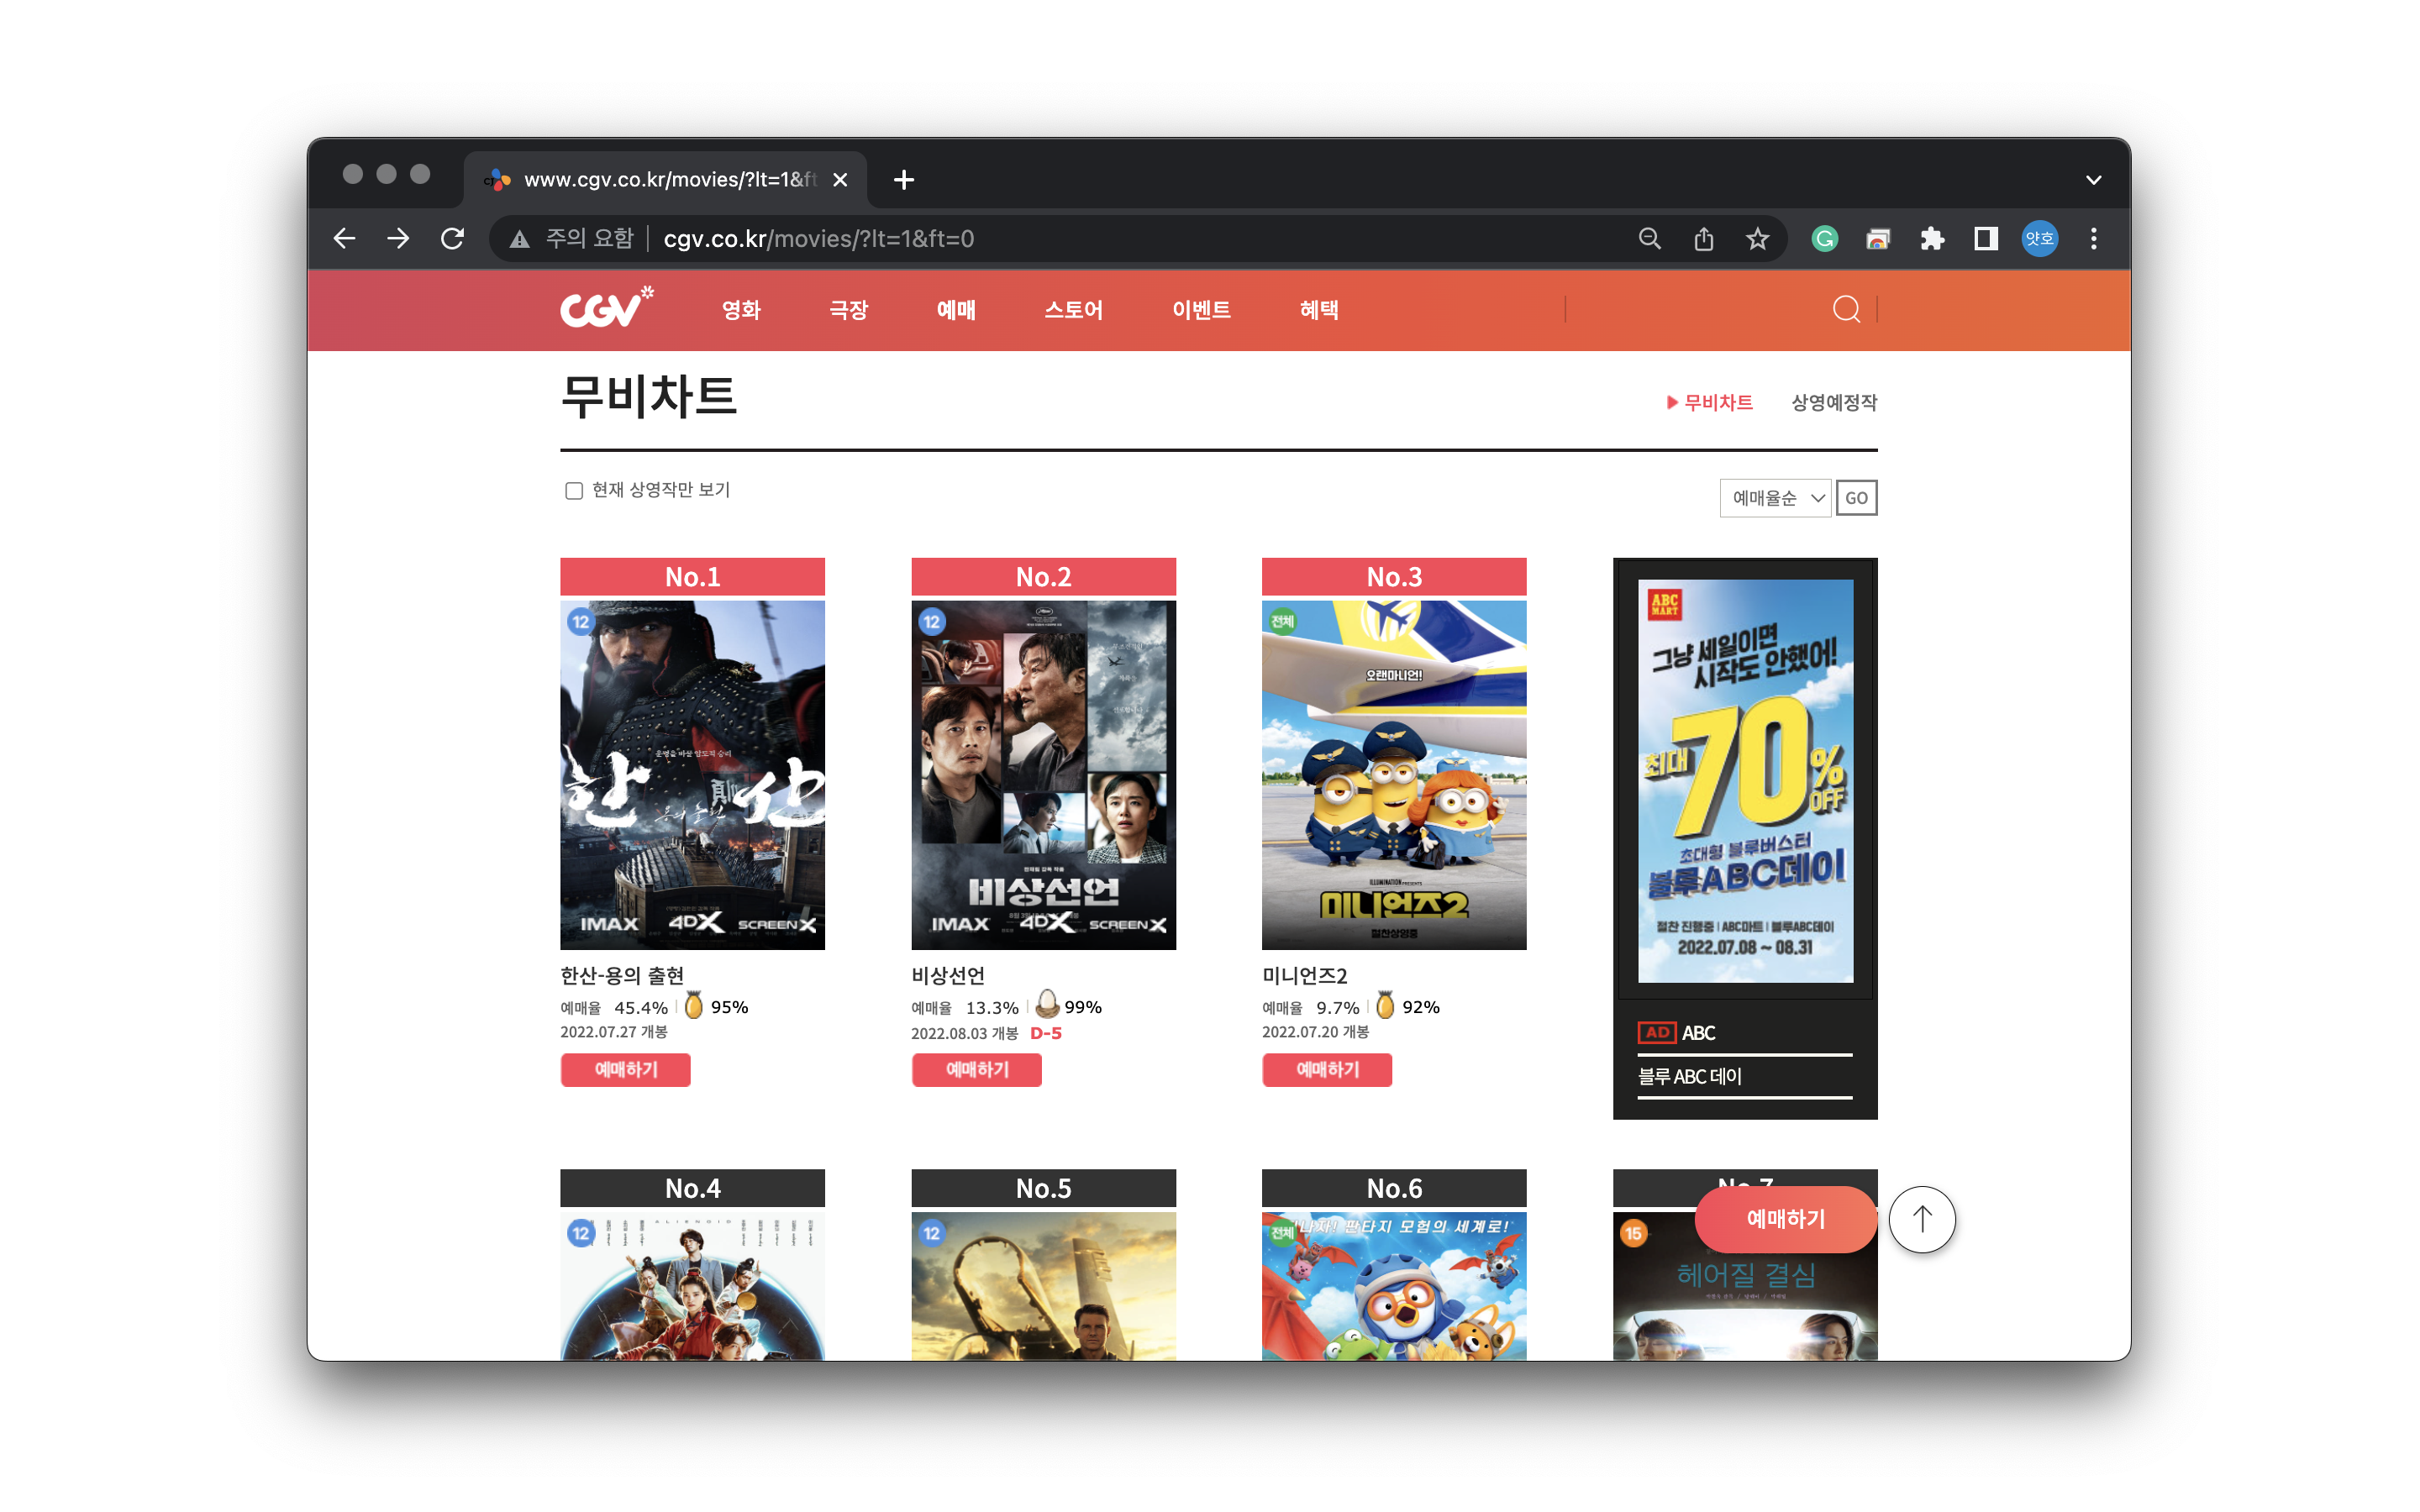
 

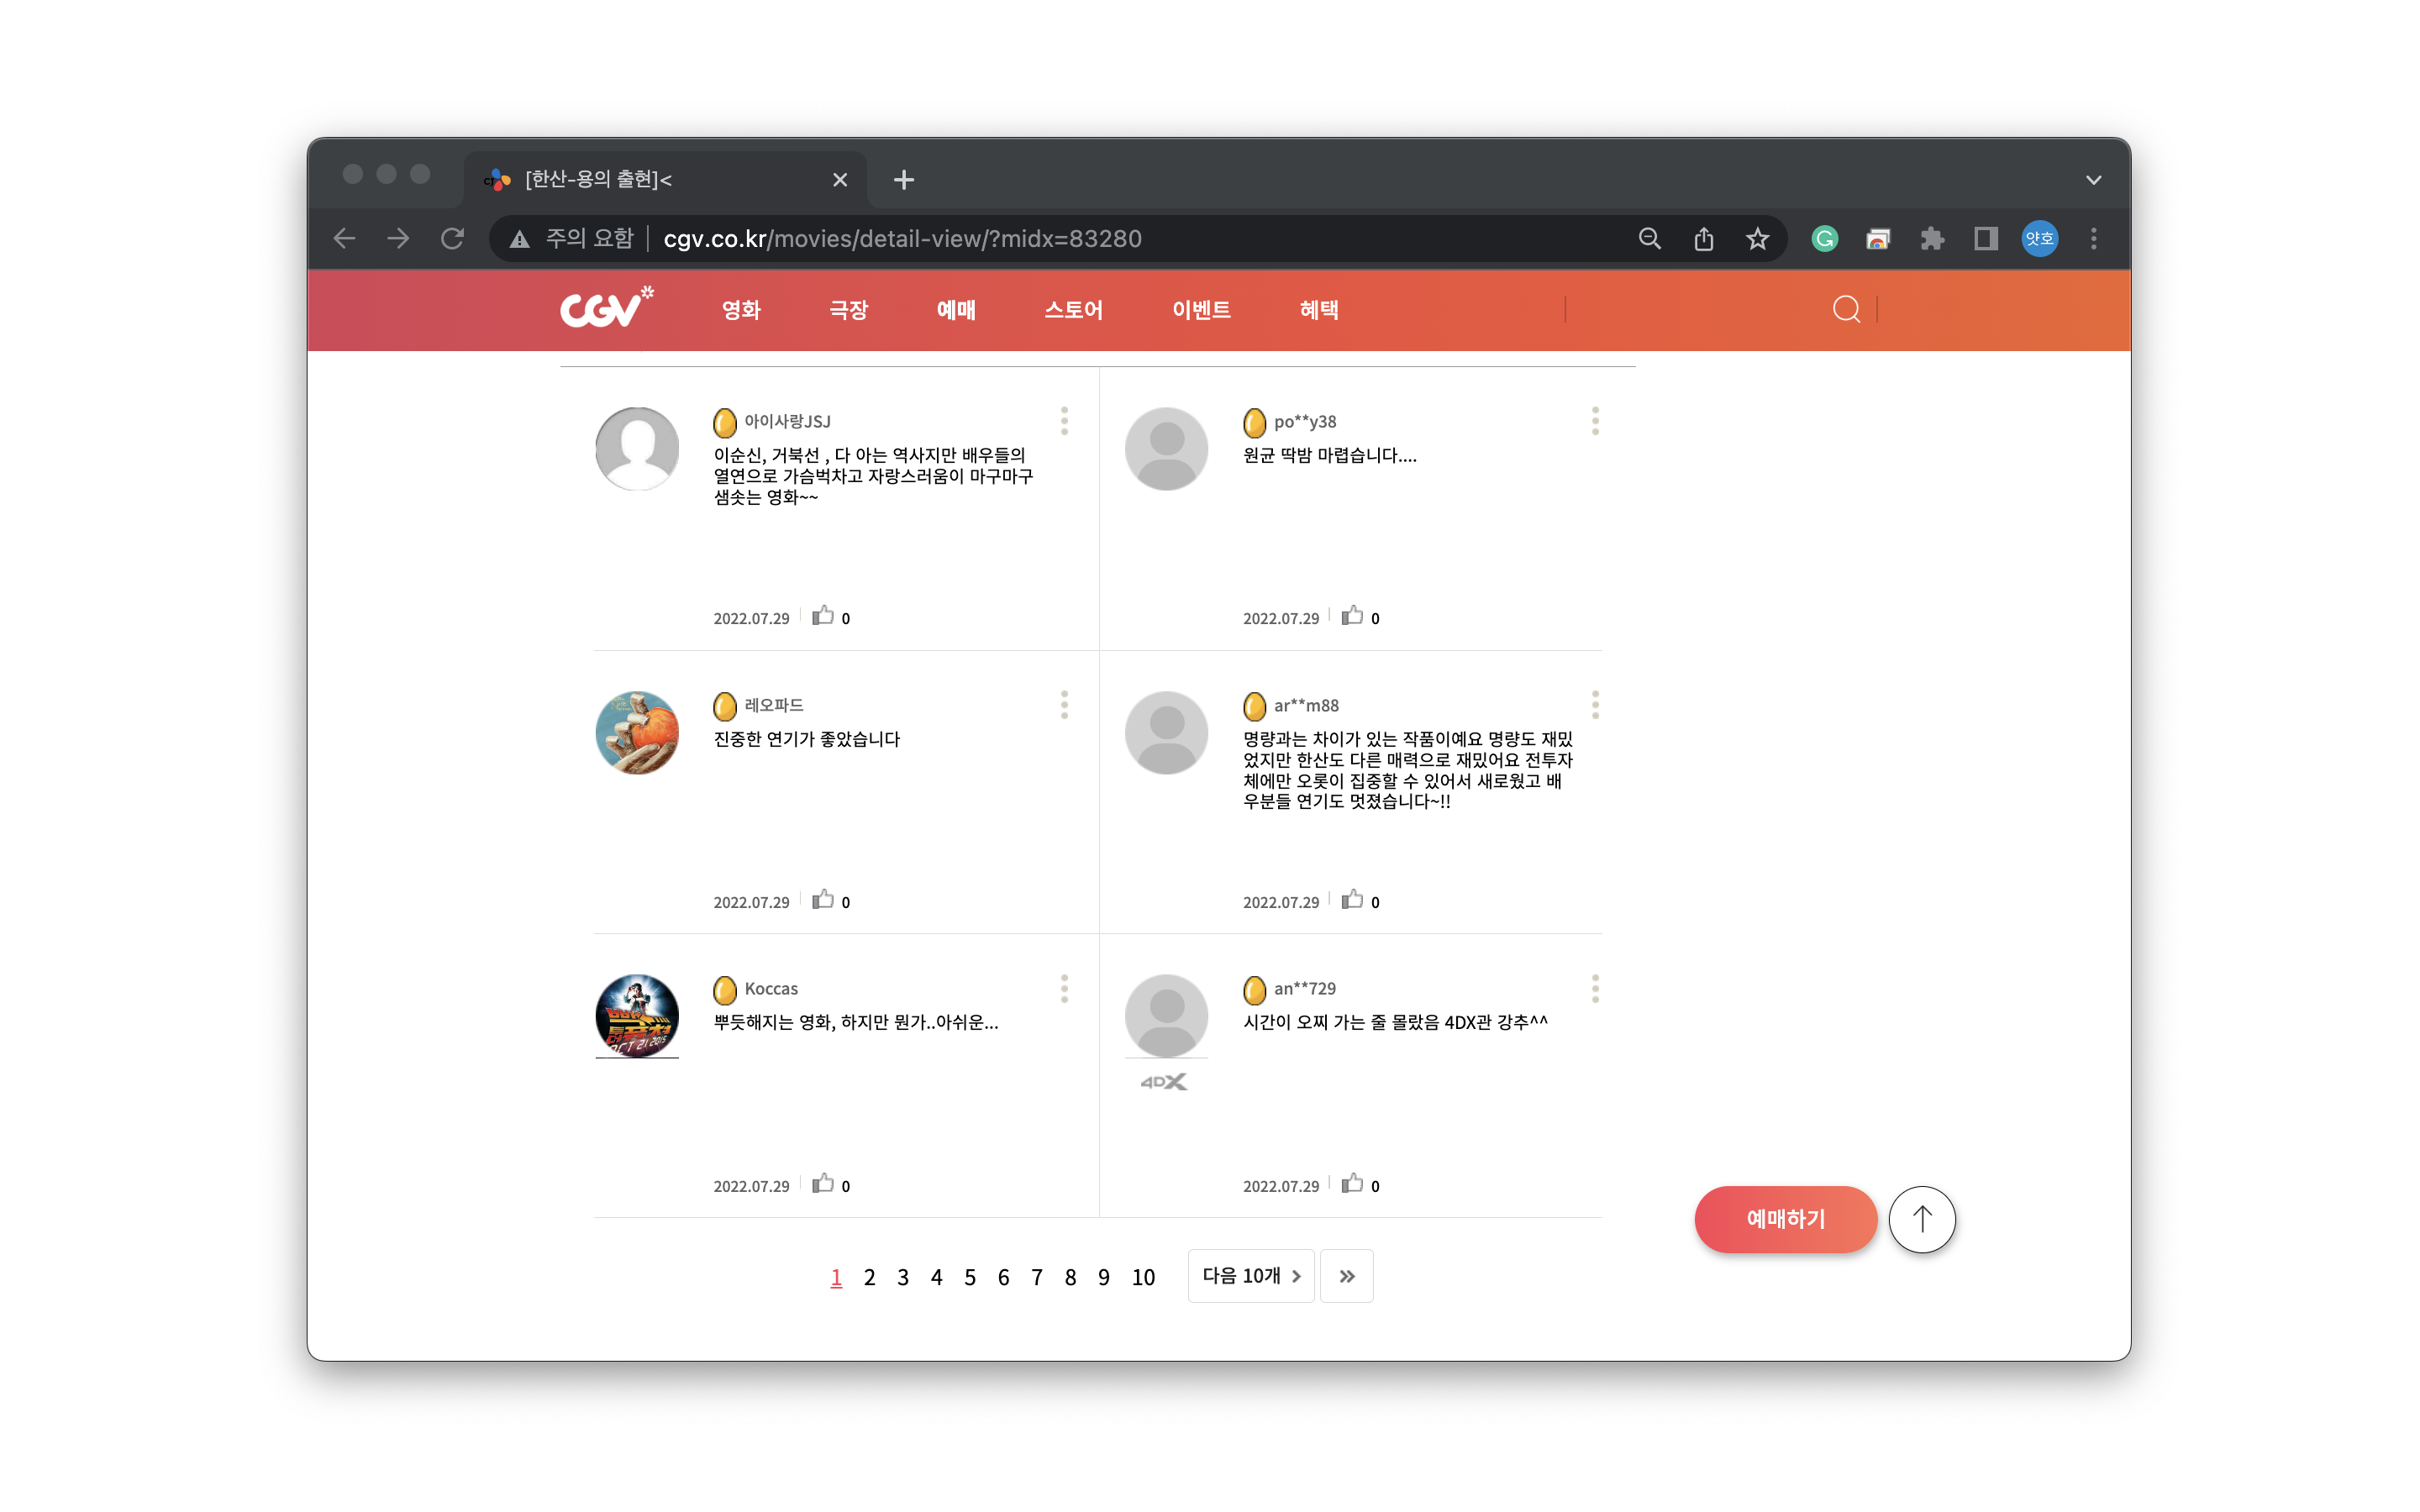 

리뷰 스크래핑한다. 

2. 이때 영화 예매 차트에서 각 영화에 들어가, pagination에 접근하는 과정에서 마우스이벤트를 처리해야하므로  

    selenium 라이브러리가 적합할 것으로 판단한다.  
    
    
3. '개발자 도구 -검사' 진행하였을 때, 찾고자 하는 모든 타겟데이터들의 id가 randomized 하지는 않으므로, 태그 명시하는 방식의 스크래핑 진행할 수 있다.  

    그러나 grid 형태의 웹페이지이므로, 반복 진행 할 때 규칙성을 보이는 <u>XPath</u>이용한 구조 중심 스크래핑을 하면 원활한 스크래핑 가능할 것이다.  

     
4. Top 1 부터 단어 스크래핑을 세 번 반복한다.  


### 01. 라이브러리 불러오기 

In [6]:
# Web Scraping : Selenium
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver import ActionChains


# Visualization 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# frequency
from collections import Counter

# keyword
from konlpy.tag import Hannanum

#time-lag
import time

#User-Agent
UA= {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36"}


### 02. 데이터 수집
#### 02-1 이벤트 요청할 경로 
: <u>XPath</u>이용한 구조 중심 스크래핑을 한다.   

영화 예매율 Top 3의 상세페이지 (여기에 리뷰가 있음) url 상 query는 규칙을 파악하기 어렵다.
- http://www.cgv.co.kr/movies/detail-view/?midx=83280
- http://www.cgv.co.kr/movies/detail-view/?midx=85465
- http://www.cgv.co.kr/movies/detail-view/?midx=83127

이것이 영화 코드라면, 시기에 따라 이 query는 변경되어 매번 TOP3의 query를 변경해주어야 할 것이다.  

또한 이 웹페이지는 grid형태이므로 XPath에 규칙성이 있어, 명령을 반복수행하기 좋을 것이다. 

따라서 
1. 시기에 좌우 받지 않으며,
2. 규칙성이 명확한  

그 상위 페이지인 'CGV 무비차트'에서 Top 3 영화를 나타내는 '위치 (XPath)'를 클릭해 접근하는 방식을 선택한다.  

Top 3 영화의 XPath는  

 - Top1: `//*[@id="contents"]/div[1]/div[3]/ol[1]/li[1]/div[2]/a/strong`  
 
 - Top2: `//*[@id="contents"]/div[1]/div[3]/ol[1]/li[2]/div[2]/a/strong`  
 
 - Top3: `//*[@id="contents"]/div[1]/div[3]/ol[1]/li[3]/div[2]/a/strong`  
 
으로, `li` 태그의 index만 변경해 준다면 쉽게 접근 할 수 있을 것이다.  

#### 02-2. 영화 예매 순위에서 영화 상세 페이지로 이동 & 다시 예매 순위 페이지로 돌아오기

In [35]:
movie_chart= "http://www.cgv.co.kr/movies/?lt=1&ft=0"
movie_path= '//*[@id="contents"]/div[1]/div[3]/ol[1]/li[{}]/div[2]/a/strong'

driver= webdriver.Chrome(service= Service(ChromeDriverManager().install()))
driver.get(movie_chart)


for i in range(1,2): #TOP1 부터 3 까지 영화의 상세페이지 접근 
    movie_click= driver.find_elements(By.XPATH, '//*[@id="contents"]/div[1]/div[3]/ol[1]/li[{}]/div[2]/a/strong'.format(i))
    ActionChains(driver).click(movie_click).perform()


AttributeError: move_to requires a WebElement

<span style="color:red">**ERR!**</span>  

`AttributeError: move_to requires a WebElement`  

에러가 났다.   

`find_element**s**` 주의...

In [40]:
movie_chart= "http://www.cgv.co.kr/movies/?lt=1&ft=0"
movie_path= '//*[@id="contents"]/div[1]/div[3]/ol[1]/li[{}]/div[2]/a/strong'

In [41]:
with webdriver.Chrome(service= Service(ChromeDriverManager().install())) as driver:
    driver.get(movie_chart)
    time.sleep(0.2)

    for i in range(1,4): #TOP1 부터 3 까지 영화의 상세페이지 접근 

        movie_click= driver.find_element(By.XPATH, movie_path.format(i))
        ActionChains(driver).click(movie_click).perform()
        driver.get(movie_chart)
        time.sleep(0.4)

#### 02-3. 영화 제목 및 상세페이지에서 데이터 크롤링 

리뷰 XPath:
- `//*[@id="liCommentFirst32983637"]/div[3]/p`
- `//*[@id="liCommentFirst32983635"]/div[3]/p`
- `//*[@id="liCommentFirst32983634"]/div[3]/p`

리뷰의 XPath를 확인해보면 규칙성은 있지만 숫자를 부여하기 어려우므로 태그 아이디를 찾는다.  

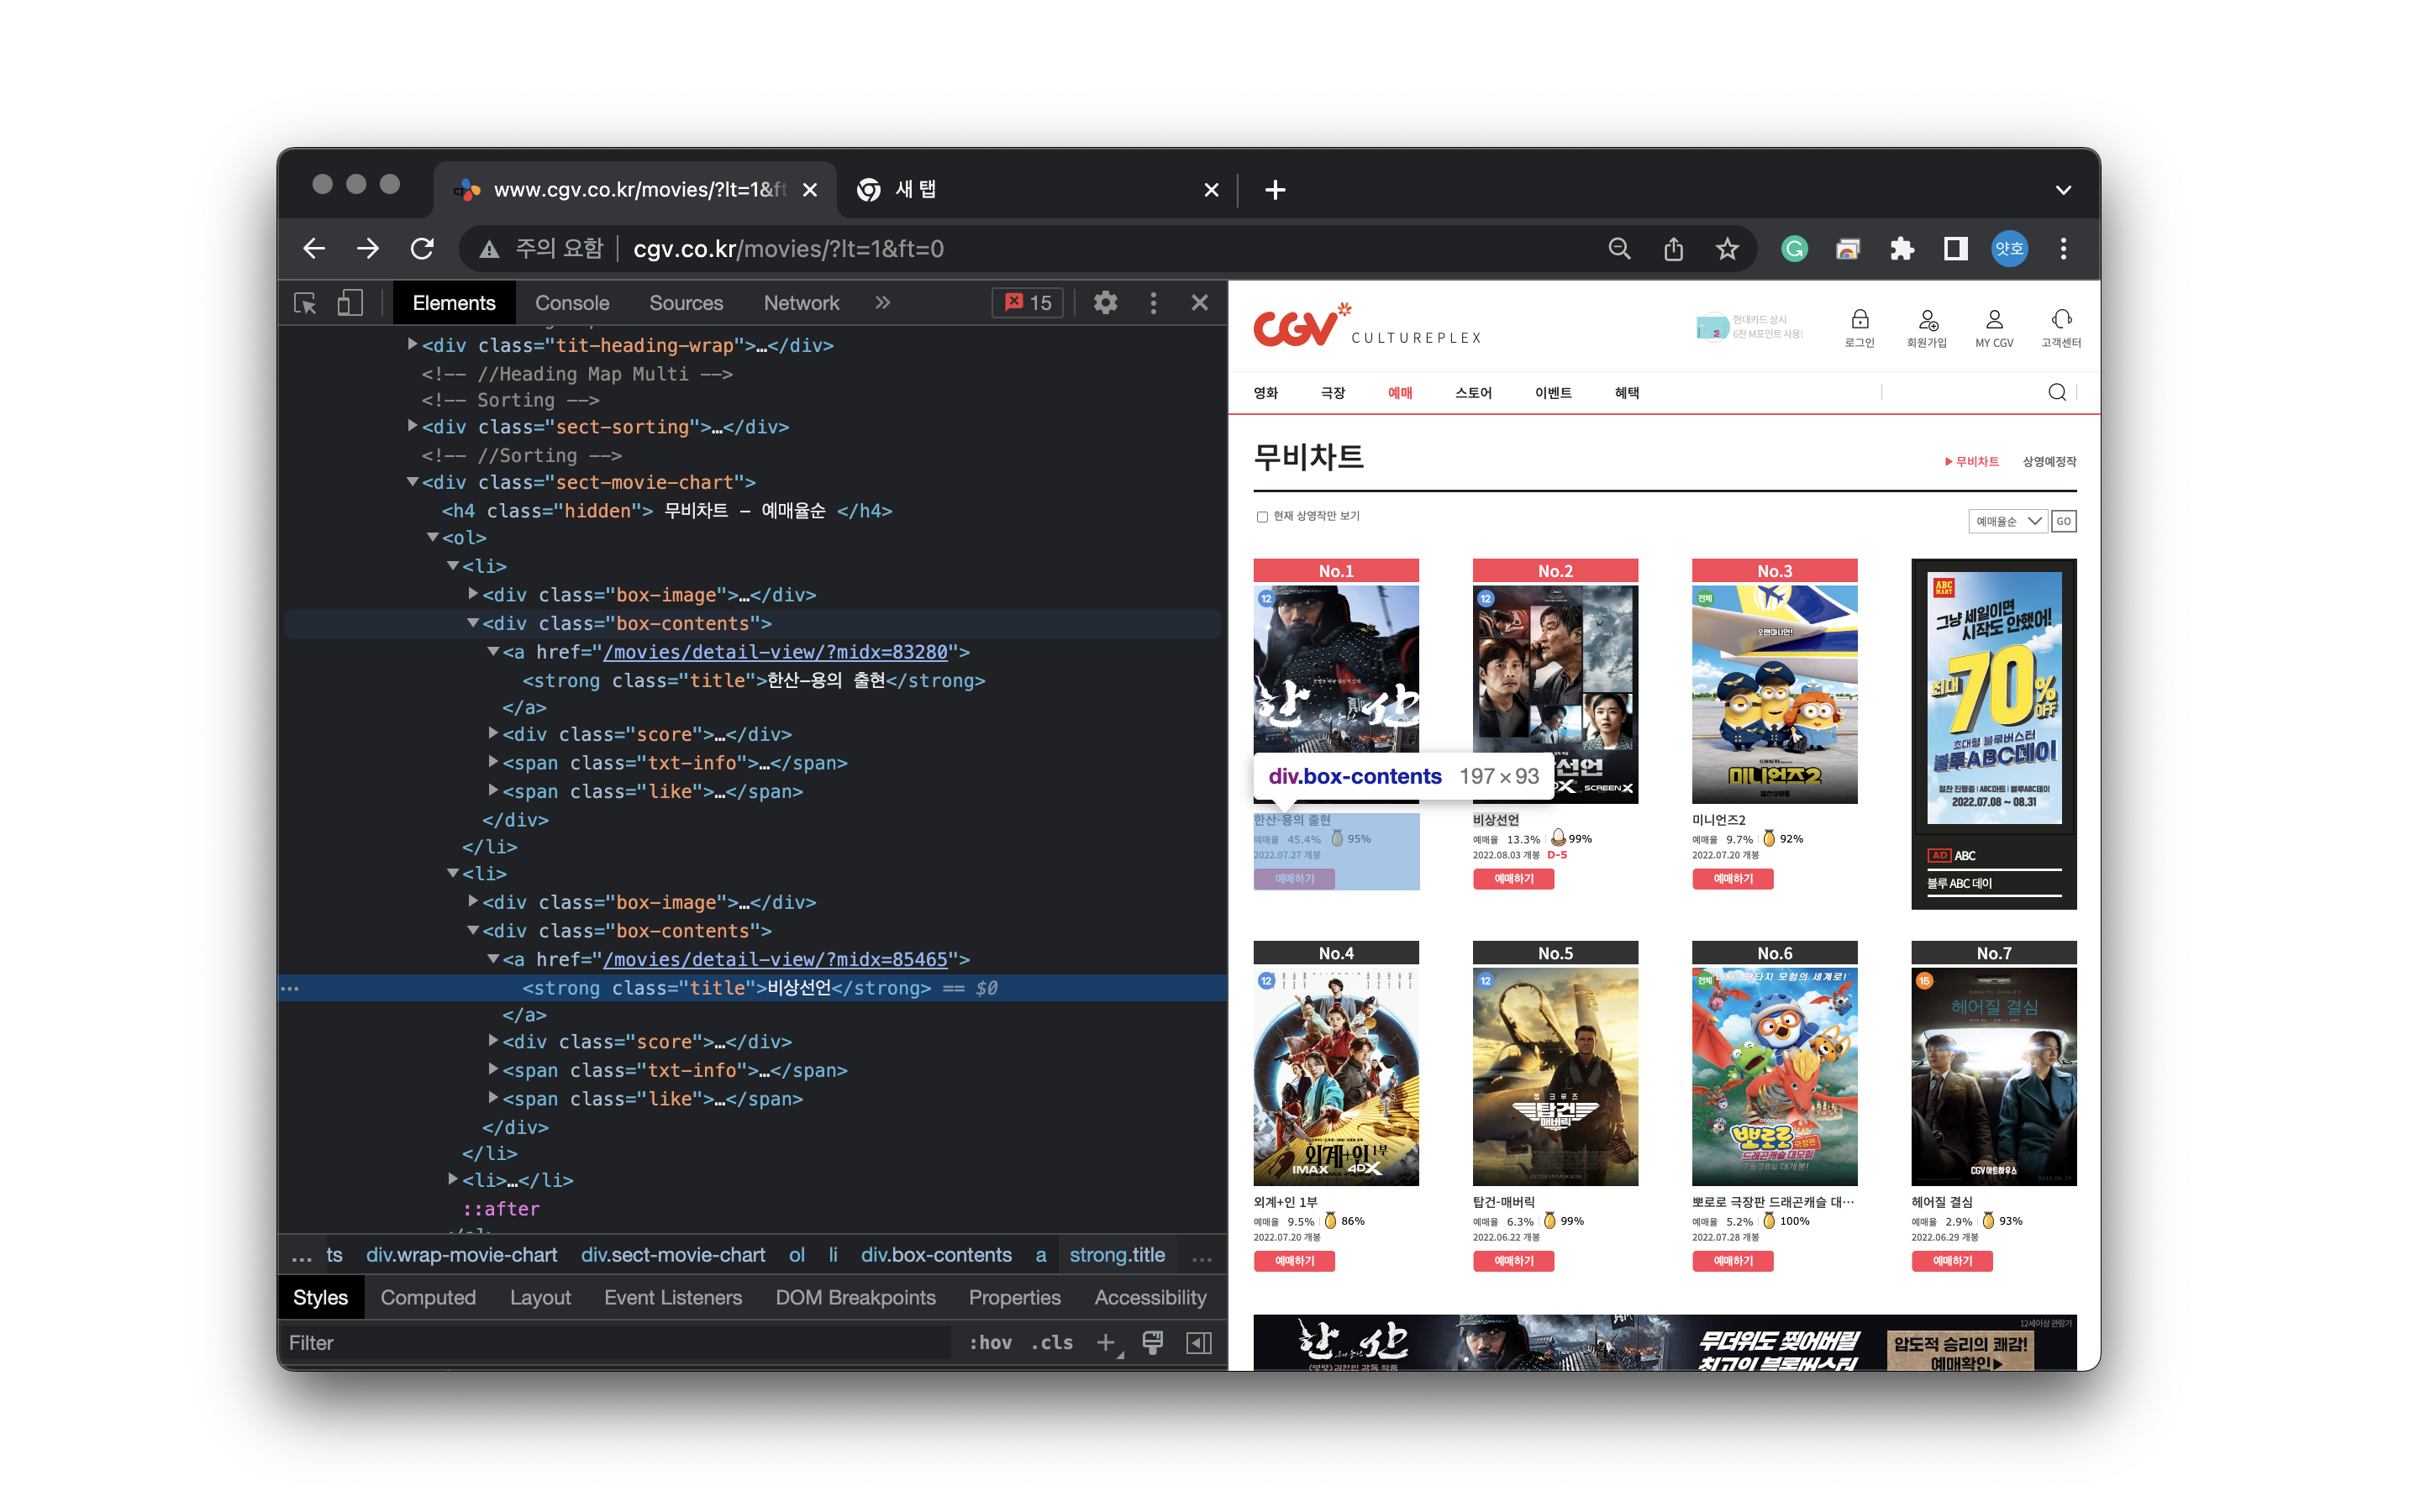

<span style="color:darkorange">box-comment</span> 태그를 찾으면 될 것 같다.  

리뷰의 pagenation은 

1. url의 쿼리를 변경해주는 방식 `http://www.cgv.co.kr/movies/detail-view/?midx=83280#{}` --> `.get()`
2. pagination 클릭해주는 방식 `//*[@id="paging_point"]/li[{}]/a` --> `ActionChains(click)`

이 있다. 

1번 방법을 이용해본다.  

현재 url을 얻어와 거기에 \#{}을 넣어준다. 


In [127]:
Top_movies={}

with webdriver.Chrome(service= Service(ChromeDriverManager().install())) as driver:
    driver.get(movie_chart)
    time.sleep(0.2)

    for i in range(1,2): #TOP1 부터 3 까지 영화의 상세페이지 접근 
        movie_click= driver.find_element(By.XPATH, movie_path.format(i))
        this_movie=movie_click.text

        ActionChains(driver).click(movie_click).perform()
        url_here= driver.current_url

        comments=[]
        for j in range(1,3): #리뷰 페이지 1~10페이지 스크랩  
            review_page=url_here + '#{}'
            print(review_page.format(j))
            driver.get(review_page.format(j))
            driver.get(review_page.format(j))            
            
            reviews= driver.find_elements(By.CLASS_NAME, "box-comment")

            for review in reviews:
                comments.append(review.text)
            
            time.sleep(1)    


        Top_movies[this_movie]=comments
        driver.get(movie_chart)
        time.sleep(0.4)

Top_movies        


http://www.cgv.co.kr/movies/detail-view/?midx=83280#1
http://www.cgv.co.kr/movies/detail-view/?midx=83280#2


{'한산-용의 출현': ['전투씬이 웅장합니다.',
  '초반 드라마 후반 액션이 탑건과 비슷한데 액션신이 아주 짜릿해요. 꼭 영화관에서 보세요!',
  '너무 재미났어요 Cg 실감나요',
  '명랑보다는 군더더기 없는 서사구조와 해전의 생생함을 만끽할 수 있는 필름',
  '거북선 개조 제데로해서 써먹네요',
  '재밌게 잘밧어요 스크린액스까진 필요없었을거같긴하지만 재미있게 잘보앗고 연기가 인상깊었습니다',
  '전투씬이 웅장합니다.',
  '초반 드라마 후반 액션이 탑건과 비슷한데 액션신이 아주 짜릿해요. 꼭 영화관에서 보세요!',
  '너무 재미났어요 Cg 실감나요',
  '명랑보다는 군더더기 없는 서사구조와 해전의 생생함을 만끽할 수 있는 필름',
  '거북선 개조 제데로해서 써먹네요',
  '재밌게 잘밧어요 스크린액스까진 필요없었을거같긴하지만 재미있게 잘보앗고 연기가 인상깊었습니다']}

<span style="color:red">**ERR! 2.**</span>  

\#{}에 따라 페이지가 넘어가야하는데 코드로는 잘 안된다.  

숫자는 올라가서 url은 바뀌는데 내용은 바뀌지 않는지, 같은 내용이 중복된다.  

다른 방법을 강구해본다. 

2번 방식으로 접근한다. 



In [200]:
page= '//*[@id="paging_point"]/li[{}]/a'

start_page=1
end_page=10

Top_movies={}

with webdriver.Chrome(service= Service(ChromeDriverManager().install())) as driver:
    driver.get(movie_chart)
    time.sleep(0.2)

    for i in range(1,3+1): #TOP1 부터 3 까지 영화의 상세페이지 접근 
        movie_click= driver.find_element(By.XPATH, movie_path.format(i))
        this_movie=movie_click.text

        ActionChains(driver).click(movie_click).perform()
        url_here= driver.current_url

        comments=[]
        
        for j in range(start_page,end_page+1): #리뷰 페이지 1~10페이지 스크랩 
    
            reviews= driver.find_elements(By.CLASS_NAME, "box-comment")

            for review in reviews:
                comments.append(review.text)

            if j != end_page:
                next_page= driver.find_element(By.XPATH, page.format(j+1))
                ActionChains(driver).click(next_page).perform()                 
                
            time.sleep(1)    


        Top_movies[this_movie]=comments
        driver.get(movie_chart)
        time.sleep(0.4)

# Top_movies        


만세만세 잘 된다.🕺🏻💃🏻  

### 03. 키워드 추출
#### 03-1. 단어 뽑기

In [201]:
han = Hannanum()

words={}
for movie in Top_movies:
    theMovie= Top_movies[movie]
    words[movie] =[]
    for word in theMovie:
        words[movie] += han.nouns(word)

# print(words)

{'한산-용의 출현': ['아주아주', '관람', '완전', '몰입해', '스토리', '몰입감👍👍', '잼', '강추강추', '강강추', '중간', '국뽕', '차오른다', '명량', '구성', '스토리', '심플한', '전쟁물', '재미', '충분함', '재밌었어요', '👍🏻👍🏻👍🏻', '한산', '바다', '신비', '한', '번', '생각', '행동', '듯', '명량이랑', '매력', '이순신', '영화', '실망', '대사', '잘', '스릴감', '한산대첩', '전투신', '다음편', '해상', '전투씬', '거북선', '멋졌어요~👍', '😍', '영화', '이순신', '대사', '해상', '전투신', '역대급', '재미', '선사함', '시원', '강추함', '다음', '응원', '출연', '배우들', '억지', '없s고', '자연', '연기', '지장', '덕장', '이순신', '장군', '무리', '연기한', '박해일', '연기', '굿', '점', '영화', '긴장감', '설정', '충파', '문제', '점', '왜군', '귀선', '설계도', '설정', '대장선', '배', '철판', '억지', '면', '앞', '이순신', '장군', '박해', '불의', '의', '…', '의', '하나', '여름날', '마음', '시원', '영화', '결말', '더더더', '변요한', '연기력', '짱입니', '초반', '지루', '전투신', '만', '애국심', '영화', '적', '힘쎈놈', '이', '짱돌', '거북선', '우리민족', '짱돌', '거북선', '때', '정말', '울컥', '역사영화', '사람', '것', '천', '영화', '재미', '말', '명량만큼', '기대', '생각듭니', '몰입도', '명량보단', '매력', '보는내내', '손', '땀', '감탄', '영화', '보기전', '명량', '영화', '도움', '되', '시간', '전편', '부족한', '것', '시간가는줄', '봤어', '박지환', '이순신에', '출정', 

#### 03-2. 추출 단어의 빈도수 

In [204]:
keyword={}
keyword10={}
for movie in words:
    thewords= words[movie]
    keyword[movie]={}
    keyword10[movie]={}
    for word in thewords:
        keyword[movie]= Counter(thewords)
        keyword10[movie]= Counter(thewords).most_common(10)
# print(keyword)

### 04. Word Cloud 생성

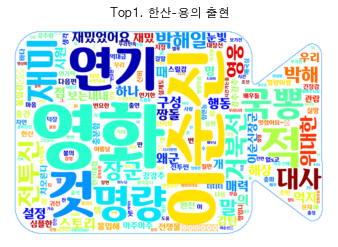

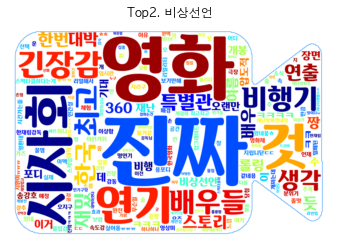

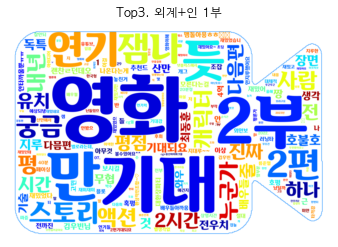

In [218]:
from PIL import Image
import numpy as np
from matplotlib import rc 

matplotlib.rcParams['font.family'] ='AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] =False

# read the mask image
H_mask = np.array(Image.open("movie_mask.png"))

# make cloud
top=1
for movie in keyword:
    cloud= WordCloud(font_path="/Users/jiwookim/Downloads/BinggraeⅡ-Bold.otf",
                    mask= H_mask,
                    background_color="white", colormap="jet",
                    contour_color="dodgerblue", contour_width= 2,
                    width=2000, height=2000, scale=3)


    img= cloud.generate_from_frequencies(keyword[movie])
    plt.title('Top{}. '.format(top) + movie)
    
    plt.axis("off")

    plt.imshow(img,interpolation='bilinear')
    plt.show()
    top += 1

생각보다 쓸 데 없는 단어 들이 많다.  

거를 수 있는 방안을 생각해 봐야 겠다.  

